# Processing Simulation Data
This notebook is to be used as a local tool to process simulation data that is generated after running ```run_sim/sh``` in the repository. This allows all simulation information to be aggregated nicely and averaged. PANDAS is the primary tool for processing the data.

In [124]:
#imports
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import math
from IPython.display import display
from matplotlib.colors import LogNorm
from matplotlib import cm
import os

%matplotlib inline

In [125]:
#get the data files
f_mean = []
f_mes = []
f_ei = []
path= '/home/vpreston/Documents/IPP/informative-path-planning/experiments'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'metric' in name and 'mean' in root:
            f_mean.append(root + "/" + name)
        elif 'metric' in name and 'exp_improve' in root:
            f_ei.append(root + "/" + name)
        elif 'metric' in name and 'mes' in root:
            f_mes.append(root + "/" + name)

In [126]:
# variables for making dataframes
l = ['time', 'info_gain','aqu_fun', 'MSE', 'hotspot_error','max_loc_error', 'max_val_error', 
                    'simple_regret', 'sample_regret_loc', 'sample_regret_val', 'regret', 'info_regret',
                    'current_highest_obs', 'current_highest_obs_loc_x', 'current_highest_obs_loc_y',
                    'robot_loc_x', 'robot_loc_y', 'robot_loc_a', 'star_obs_0', 'star_obs_loc_x_0',
                    'star_obs_loc_y_0', 'star_obs_1', 'star_obs_loc_x_1', 'star_obs_loc_y_1']

In [127]:
#All UCB data
d = f_mean[0]
mean_data = pd.read_table(d, delimiter = " ", header=None)
mean_data = mean_data.T
mean_data.columns = l

for m in f_mean[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    mean_data = mean_data.append(temp_data)

mean_data.head(5)
print len(mean_data)

3325


In [128]:
#All MES data
d = f_mes[0]
mes_data = pd.read_table(d, delimiter = " ", header=None)
mes_data = mes_data.T
mes_data.columns = l

for m in f_mes[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    mes_data = mes_data.append(temp_data)

mes_data.head(5)
print len(mes_data)

3325


In [129]:
#All EI data
d = f_ei[0]
ei_data = pd.read_table(d, delimiter = " ", header=None)
ei_data = ei_data.T
ei_data.columns = l

for m in f_ei[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    ei_data = ei_data.append(temp_data)

ei_data.head(5)
print len(ei_data)

3325


## Getting Averages at the End of Time
First, let's go ahead and get a snapshot of the last frame for all of these simulations

In [131]:
mean_end = mean_data[mean_data.time == 174]
mes_end = mes_data[mes_data.time == 174]
ei_end = ei_data[ei_data.time == 174]

for e in l:
    print '-------------'
    print str(e)
    print 'MEAN:    ' + str(mean_end[e].mean()) + ', ' + str(mean_end[e].std())
    print 'MES :    ' + str(mes_end[e].mean()) + ', '  + str(mes_end[e].std())
    print 'EI  :    ' + str(ei_end[e].mean()) + ', ' + str(ei_end[e].std())

-------------
time
MEAN:    174.0, 0.0
MES :    174.0, 0.0
EI  :    174.0, 0.0
-------------
info_gain
MEAN:    22802.0843046, 1123.17550336
MES :    21712.5414852, 1017.10360536
EI  :    17431.0382326, 2363.94845091
-------------
aqu_fun
MEAN:    348528.664553, 12699.8815916
MES :    455.220694362, 33.7880961038
EI  :    56830.3412734, 9904.74833354
-------------
MSE
MEAN:    0.544991048711, 0.549624924661
MES :    0.701390341014, 0.461756622383
EI  :    5.55468520305, 5.53179048675
-------------
hotspot_error
MEAN:    0.733459822195, 0.746579671747
MES :    1.15451642702, 0.867340313035
EI  :    7.52062968187, 8.75087005949
-------------
max_loc_error
MEAN:    1.49897613682, 2.3197252252
MES :    1.26491043611, 2.20382777341
EI  :    1.14489978429, 2.0561047236
-------------
max_val_error
MEAN:    0.723198105172, 0.592731870176
MES :    0.725726122815, 0.569371536369
EI  :    0.758626058051, 0.587477424543
-------------
simple_regret
MEAN:    3.37217637778, 2.81122151159
MES :    1.1

## Looking at Samples
Now, we'll take a look at the relative distance from the best hotspot the samples across the trials were taken.

In [132]:
# get the robot log files
max_val = []
max_loc = []
path= '/home/vpreston/Documents/IPP/informative-path-planning/experiments'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'log' in name and 'mean' in root:
            temp = open(root+'/'+name, "r")
            for l in temp.readlines():
                if "max value" in l:
                    max_val.append(float(l.split(" ")[3]))
                    max_loc.append((float(l.split(" ")[6].split("[")[1]), float(l.split(" ")[7].split("]")[0])))

In [159]:
# get the robot samples list
mean_samples = []
mes_samples = []
ei_samples = []

path= '/home/vpreston/Documents/IPP/informative-path-planning/experiments'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'robot_model' in name and 'mean' in root:
            mean_samples.append(root+"/"+name)
        elif 'robot_model' in name and 'exp_improve' in root:
            ei_samples.append(root+"/"+name)
        elif 'robot_model' in name and 'mes' in root:
            mes_samples.append(root+"/"+name)

##### MEAN
mean_prop = []
d = mean_samples[0]
mean_sdata = pd.read_table(d, delimiter = " ", header=None)
mean_sdata = mean_sdata.T
mean_sdata.columns = ['x','y','a']
mean_sdata.loc[:, 'Distance'] = mean_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
mean_prop.append(float(len(mean_sdata[mean_sdata.Distance < 1.5]))/len(mean_sdata))

for i,m in enumerate(mean_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    mean_prop.append(float(len(temp_data[temp_data.Distance < 1.5]))/len(temp_data))
    mean_sdata = mean_sdata.append(temp_data)

##### MES
mes_prop = []
d = mes_samples[0]
mes_sdata = pd.read_table(d, delimiter = " ", header=None)
mes_sdata = mes_sdata.T
mes_sdata.columns = ['x','y','a']
mes_sdata.loc[:, 'Distance'] = mes_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
mes_prop.append(float(len(mes_sdata[mes_sdata.Distance < 1.5]))/len(mes_sdata))

for i,m in enumerate(mes_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    mes_prop.append(float(len(temp_data[temp_data.Distance < 1.5]))/len(temp_data))
    mes_sdata = mes_sdata.append(temp_data)

##### EI
ei_prop = []
d = ei_samples[0]
ei_sdata = pd.read_table(d, delimiter = " ", header=None)
ei_sdata = ei_sdata.T
ei_sdata.columns = ['x','y','a']
ei_sdata.loc[:, 'Distance'] = ei_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
ei_prop.append(float(len(ei_sdata[ei_sdata.Distance < 1.5]))/len(ei_sdata))

for i,m in enumerate(ei_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    ei_prop.append(float(len(temp_data[temp_data.Distance < 1.5]))/len(temp_data))
    ei_sdata = ei_sdata.append(temp_data)

/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  
/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  


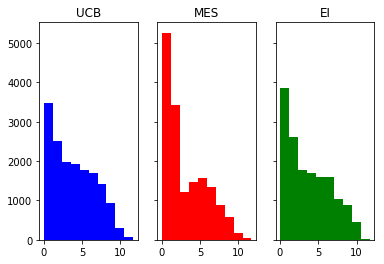

In [160]:
#make the aggregate histograms
fig, axes = plt.subplots(1, 3, sharey = True)

axes[0].hist(mean_sdata['Distance'].values, bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'b')
axes[0].set_title("UCB")
axes[1].hist(mes_sdata['Distance'].values, bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'r')
axes[1].set_title("MES")
axes[2].hist(ei_sdata['Distance'].values,bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'g')
axes[2].set_title("EI")
plt.show()

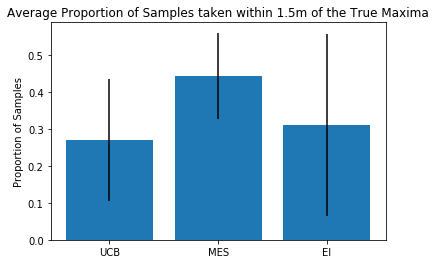

In [163]:
# make the proportional barcharts
plt.bar(np.arange(3), [sum(m)/len(m) for m in (mean_prop, mes_prop, ei_prop)], yerr=[np.std(m) for m in (mean_prop, mes_prop, ei_prop)])
plt.xticks(np.arange(3),['UCB', 'MES', 'EI'])
plt.ylabel('Proportion of Samples')
plt.title('Average Proportion of Samples taken within 1.5m of the True Maxima')
plt.show()

## Getting Rates of Convergence
What about how things progress over time? Do things converge? When? Is it consistent? These sets of plots and figures attempt to address convergence; which hopefully lends itself to stopping criteria.

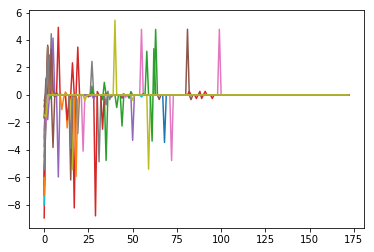

In [178]:
for i in range(19):
    slope = []
    for j in range(173):
        slope.append(mean_data[mean_data.time == j+1]['max_loc_error'].values[i]-mean_data[mean_data.time == j]['max_loc_error'].values[i])
    plt.plot(slope)
plt.show()

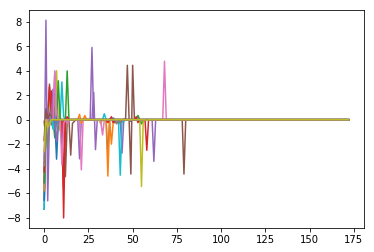

In [179]:
for i in range(19):
    slope = []
    for j in range(173):
        slope.append(mes_data[mes_data.time == j+1]['max_loc_error'].values[i]-mes_data[mes_data.time == j]['max_loc_error'].values[i])
    plt.plot(slope)
plt.show()

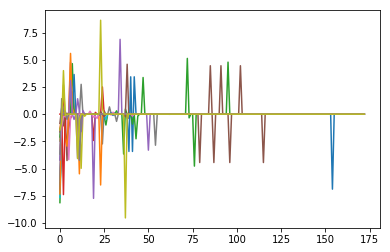

In [180]:
for i in range(19):
    slope = []
    for j in range(173):
        slope.append(ei_data[ei_data.time == j+1]['max_loc_error'].values[i]-ei_data[ei_data.time == j]['max_loc_error'].values[i])
    plt.plot(slope)
plt.show()